In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('./flight.csv', sep=',')
df = df.drop(["Unnamed: 0"], axis=1)

df.head()

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,2013-1-1 05:40:00,2013-1-1 05:42:00,2013-1-1 09:23:00,2013-1-1 08:50:00,1141,JFK,MIA
1,2013-1-1 06:00:00,2013-1-1 05:54:00,2013-1-1 08:12:00,2013-1-1 08:37:00,461,LGA,ATL
2,2013-1-1 05:58:00,2013-1-1 05:54:00,2013-1-1 07:40:00,2013-1-1 07:28:00,1696,EWR,ORD
3,2013-1-1 06:00:00,2013-1-1 05:55:00,2013-1-1 09:13:00,2013-1-1 08:54:00,507,EWR,FLL
4,2013-1-1 06:00:00,2013-1-1 05:57:00,2013-1-1 08:38:00,2013-1-1 08:46:00,79,JFK,MCO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   datetime_val    121427 non-null  object
 1   dep_time        121427 non-null  object
 2   arr_time        121427 non-null  object
 3   sched_arr_time  121427 non-null  object
 4   flight          121427 non-null  int64 
 5   origin          121427 non-null  object
 6   dest            121427 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.5+ MB


In [4]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'], errors='coerce')
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datetime_val    121427 non-null  datetime64[ns]
 1   dep_time        121421 non-null  datetime64[ns]
 2   arr_time        121379 non-null  datetime64[ns]
 3   sched_arr_time  121427 non-null  datetime64[ns]
 4   flight          121427 non-null  int64         
 5   origin          121427 non-null  object        
 6   dest            121427 non-null  object        
dtypes: datetime64[ns](4), int64(1), object(2)
memory usage: 6.5+ MB


In [5]:
# seting next day for overnight flights
for index, row in df.iterrows():
    #if air_time is negative
    if (row['arr_time']<row['dep_time']):
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)

In [6]:
df['air_time'] = df['arr_time']-df['dep_time']
df['delay'] = df['arr_time'] - df['sched_arr_time']

df.head()

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00


In [7]:
df["percent_delay"] = (100 * df['delay'])/df['air_time']

df.head()

,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944


<AxesSubplot:>

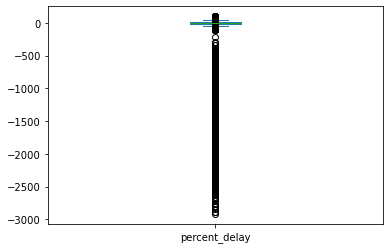

In [8]:
df['percent_delay'].plot.box()

In [9]:
minrow = df['percent_delay'].argmin()
df.loc[minrow]

datetime_val      2013-04-01 20:40:00
dep_time          2013-04-01 22:45:00
arr_time          2013-04-01 23:31:00
sched_arr_time    2013-04-02 21:54:00
flight                           1178
origin                            EWR
dest                              BOS
air_time              0 days 00:46:00
delay               -1 days +01:37:00
percent_delay            -2919.565217
Name: 59583, dtype: object

datetime_val      2013-11-13 14:55:00
dep_time          2013-11-13 14:50:00
arr_time          2013-11-13 17:20:00
sched_arr_time    2013-11-13 18:19:00
flight                            841
origin                            JFK
dest                              LAX
air_time              0 days 02:30:00
delay               -1 days +23:01:00
percent_delay              -39.333333
Name: 24558, dtype: object

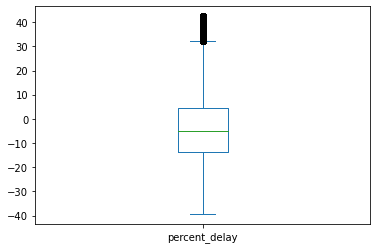

In [10]:
# removing outliers

from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

df["percent_delay"] = remove_outlier(df["percent_delay"])

df['percent_delay'].plot.box()

minrow = df['percent_delay'].argmin()
df.loc[minrow]